# Student Name: Hassan Almosa
# Student FAN: Alia0024
# File: Alia0024_Lab04.ipynb
# Date: 09-09-2025
# Description: Supervised Learning - Lab 04
# Licence: MIT Licence

## Imports 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay
import warnings
warnings.filterwarnings('ignore')

# Lab Eexcercises

# Titanic Dataset - Binary Classification

Let's implement Logistic Regression for binary classification using the Titanic dataset to predict passenger survival.

## Load

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay 

In [4]:

# Load Titanic dataset directly from a CSV URL 
titanic_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(titanic_url)

print("Dataset shape:", titanic.shape)
print("\nFirst 5 records:")
print(titanic.head())
print("\nColumn names:")
print(list(titanic.columns))
print("\nDataset info:")
print(titanic.info())

Dataset shape: (891, 12)

First 5 records:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0    

In [16]:
# Load Dataset - Include all features (will need preprocessing for categorical)
# Note: This dataset uses 'Survived' (capital S)
X = titanic.drop(columns=['Survived'])
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature columns:")
print(list(X.columns))

#Identify categorical columns
print("categorical columns:\n", titanic.select_dtypes(include=['object']), "\n-------")

Features shape: (891, 11)
Target shape: (891,)

Feature columns:
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
categorical columns:
                                                   Name     Sex  \
0                              Braund, Mr. Owen Harris    male   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                               Heikkinen, Miss. Laina  female   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                             Allen, Mr. William Henry    male   
..                                                 ...     ...   
886                              Montvila, Rev. Juozas    male   
887                       Graham, Miss. Margaret Edith  female   
888           Johnston, Miss. Catherine Helen "Carrie"  female   
889                              Behr, Mr. Karl Howell    male   
890                                Dooley, Mr. Patrick    male   

               

In [47]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Feature Engineering: Names and Tickets and Encoding of Categorical Values

Based on your insights, we will now perform advanced feature engineering on the `Name` and `Ticket` columns to create more predictive features. This involves:
1.  **Name Analysis**: Extracting last names to identify family groups.
2.  **Ticket Analysis**: Deconstructing tickets into prefixes and numbers to identify shared tickets and booking locations.
3.  **Encoding**: Applying a smart encoding strategy to these new features.

In [60]:
# Create a copy for baseline approach (just encode categoricals, drop Name)
titanic_baseline = titanic.copy()

# --- Handle Missing Values ---
# Fill missing Age with the median
titanic_baseline['Age'] = titanic_baseline['Age'].fillna(titanic_baseline['Age'].median())
# Fill missing Embarked with the most common port
titanic_baseline['Embarked'] = titanic_baseline['Embarked'].fillna(titanic_baseline['Embarked'].mode()[0])

# --- Simple Encoding (Baseline) ---
# Just encode Sex and Embarked, drop Name and Ticket
titanic_baseline['Sex_encoded'] = titanic_baseline['Sex'].map({'male': 0, 'female': 1})
titanic_baseline['Embarked_encoded'] = pd.factorize(titanic_baseline['Embarked'])[0]

# --- Assemble the Baseline Dataset ---
# Select only basic features (no advanced feature engineering)
baseline_feature_columns = [
    'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',  # Original numeric columns
    'Sex_encoded', 'Embarked_encoded'           # Simple encoded categoricals only
]

X_baseline = titanic_baseline[baseline_feature_columns]
y_baseline = titanic_baseline['Survived']

# Display the results
print("=== BASELINE MODEL (Simple encoding only) ===")
print("\nBaseline feature columns:")
print(X_baseline.columns.tolist())
print("\nData types of baseline features:")
print(X_baseline.dtypes)
print("\nFirst 5 rows of the baseline dataset:")
print(X_baseline.head())

print("\n" + "="*50)

# Now create advanced feature engineering version for comparison
titanic_advanced = titanic.copy()

# --- Handle Missing Values ---
titanic_advanced['Age'] = titanic_advanced['Age'].fillna(titanic_advanced['Age'].median())
titanic_advanced['Embarked'] = titanic_advanced['Embarked'].fillna(titanic_advanced['Embarked'].mode()[0])

# --- Advanced Feature Engineering ---
# 1. Encode Last Name to identify families
titanic_advanced['LastName'] = titanic_advanced['Name'].apply(lambda x: x.split(',')[0])
titanic_advanced['LastName_encoded'] = pd.factorize(titanic_advanced['LastName'])[0]

# 2. Encode Ticket Number to identify shared tickets
titanic_advanced['TicketNumber_encoded'] = pd.factorize(titanic_advanced['Ticket'])[0]

# 3. Create and encode a cleaned Ticket Prefix
titanic_advanced['TicketPrefix'] = titanic_advanced['Ticket'].apply(lambda x: ''.join(x.split(' ')[:-1])).str.upper().str.replace('[./]', '', regex=True)
titanic_advanced['TicketPrefix'] = titanic_advanced['TicketPrefix'].replace('', 'NONE')
titanic_advanced['TicketPrefix_encoded'] = pd.factorize(titanic_advanced['TicketPrefix'])[0]

# 4. Encode Sex and Embarked
titanic_advanced['Sex_encoded'] = titanic_advanced['Sex'].map({'male': 0, 'female': 1})
titanic_advanced['Embarked_encoded'] = pd.factorize(titanic_advanced['Embarked'])[0]

# --- Assemble the Advanced Dataset ---
advanced_feature_columns = [
    'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',  # Original numeric columns
    'Sex_encoded', 'Embarked_encoded',         # Simple encoded categoricals
    'LastName_encoded', 'TicketNumber_encoded', 'TicketPrefix_encoded' # Advanced engineered features
]

X_advanced = titanic_advanced[advanced_feature_columns]
y_advanced = titanic_advanced['Survived']

print("=== ADVANCED MODEL (With feature engineering) ===")
print("\nAdvanced feature columns:")
print(X_advanced.columns.tolist())
print("\nFirst 5 rows of the advanced dataset:")
print(X_advanced.head())

=== BASELINE MODEL (Simple encoding only) ===

Baseline feature columns:
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encoded', 'Embarked_encoded']

Data types of baseline features:
Pclass                int64
Age                 float64
SibSp                 int64
Parch                 int64
Fare                float64
Sex_encoded           int64
Embarked_encoded      int64
dtype: object

First 5 rows of the baseline dataset:
   Pclass   Age  SibSp  Parch     Fare  Sex_encoded  Embarked_encoded
0       3  22.0      1      0   7.2500            0                 0
1       1  38.0      1      0  71.2833            1                 1
2       3  26.0      0      0   7.9250            1                 0
3       1  35.0      1      0  53.1000            1                 0
4       3  35.0      0      0   8.0500            0                 0

=== ADVANCED MODEL (With feature engineering) ===

Advanced feature columns:
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encoded', 'Embarke

## Model Comparison: Baseline vs Advanced Feature Engineering

Let's train and compare both models to see the impact of feature engineering on accuracy.

In [64]:
# === BASELINE MODEL TRAINING ===
print("Training BASELINE model...")

# Split the baseline data
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(
    X_baseline, y_baseline, test_size=0.2, random_state=42, stratify=y_baseline
)


print("Training set shape Baseline:", X_baseline.shape)
print("Test set shape Baseline:", X_test_baseline.shape)


# Scale the baseline features
scaler_baseline = StandardScaler()
X_train_baseline_scaled = scaler_baseline.fit_transform(X_train_baseline)
X_test_baseline_scaled = scaler_baseline.transform(X_test_baseline)

# Train baseline model
baseline_model = LogisticRegression(random_state=42, max_iter=1000)
baseline_model.fit(X_train_baseline_scaled, y_train_baseline)

# Make predictions
y_pred_baseline = baseline_model.predict(X_test_baseline_scaled)

# Calculate accuracy
accuracy_baseline = accuracy_score(y_test_baseline, y_pred_baseline)

print(f"BASELINE Model Accuracy: {accuracy_baseline:.4f} ({accuracy_baseline*100:.2f}%)")
print(f"Number of features: {len(baseline_feature_columns)}")
print(f"Features used: {baseline_feature_columns}")

Training BASELINE model...
Training set shape Baseline: (891, 7)
Test set shape Baseline: (179, 7)
BASELINE Model Accuracy: 0.8045 (80.45%)
Number of features: 7
Features used: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encoded', 'Embarked_encoded']


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:165: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:165: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:165: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Libr

In [69]:
# === ADVANCED MODEL TRAINING ===
print("Training ADVANCED model...")

# Split the advanced data
X_train_advanced, X_test_advanced, y_train_advanced, y_test_advanced = train_test_split(
    X_advanced, y_advanced, test_size=0.2, random_state=42, stratify=y_advanced
)


print("Training set shape Baseline:", X_advanced.shape)
print("Test set shape Baseline:", X_advanced.shape)
# Scale the advanced features
scaler_advanced = StandardScaler()
X_train_advanced_scaled = scaler_advanced.fit_transform(X_train_advanced)
X_test_advanced_scaled = scaler_advanced.transform(X_test_advanced)

# Train advanced model
advanced_model = LogisticRegression(random_state=42, max_iter=1000)
advanced_model.fit(X_train_advanced_scaled, y_train_advanced)

# Make predictions
y_pred_advanced = advanced_model.predict(X_test_advanced_scaled)

# Calculate accuracy
accuracy_advanced = accuracy_score(y_test_advanced, y_pred_advanced)

# Evaluate the model's performance
accuracy_advanced = accuracy_score(y_test_advanced, y_pred_advanced)
conf_matrix_advanced = confusion_matrix(y_test_advanced, y_pred_advanced)



print(f"ADVANCED Model Accuracy: {accuracy_advanced:.4f} ({accuracy_advanced*100:.2f}%)")
print(f"Number of features: {len(advanced_feature_columns)}")
print(f"Features used: {advanced_feature_columns}")




Training ADVANCED model...
Training set shape Baseline: (891, 10)
Test set shape Baseline: (891, 10)
=== FINAL MODEL RESULTS (with simplified features) ===
Accuracy: 0.8045 (80.45%)

Confusion Matrix:
[[97 13]
 [22 47]]

Detailed Classification Report:
                 precision    recall  f1-score   support

Did not survive       0.82      0.88      0.85       110
       Survived       0.78      0.68      0.73        69

       accuracy                           0.80       179
      macro avg       0.80      0.78      0.79       179
   weighted avg       0.80      0.80      0.80       179

ADVANCED Model Accuracy: 0.8045 (80.45%)
Number of features: 10
Features used: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encoded', 'Embarked_encoded', 'LastName_encoded', 'TicketNumber_encoded', 'TicketPrefix_encoded']


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:165: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:165: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:165: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:295: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_linea

In [ ]:
# print(X_final.Sex_encoded)
# print(X_final.Embarked_encoded)
# print(X_final.LastName_encoded)
# print(X_final.TicketNumber_encoded)
# print(X_final.TicketPrefix_encoded)

=== FINAL MODEL RESULTS (with simplified features) ===
Accuracy: 0.8045 (80.45%)

Confusion Matrix:
[[97 13]
 [22 47]]

Detailed Classification Report:
                 precision    recall  f1-score   support

Did not survive       0.82      0.88      0.85       110
       Survived       0.78      0.68      0.73        69

       accuracy                           0.80       179
      macro avg       0.80      0.78      0.79       179
   weighted avg       0.80      0.80      0.80       179



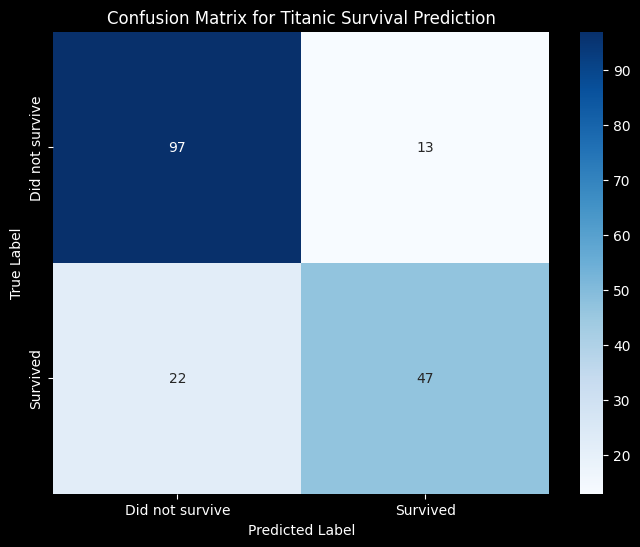

In [71]:
print("=== FINAL MODEL RESULTS (with simplified features) ===")
print(f"Accuracy: {accuracy_advanced:.4f} ({accuracy_advanced*100:.2f}%)")
print("\nConfusion Matrix:")
print(conf_matrix_advanced)
print("\nDetailed Classification Report:")
print(classification_report(y_test_advanced, y_pred_advanced, 
                          target_names=['Did not survive', 'Survived']))


import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_advanced, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Did not survive', 'Survived'], 
            yticklabels=['Did not survive', 'Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Titanic Survival Prediction')
plt.show()

# Iris Dataset - Multiclass Classification with Cross-Validation

Implement Logistic Regression for multiclass classification using the Iris dataset. Use cross-validation to evaluate the model's performance.

In [80]:
# Load the Iris dataset
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

print("Dataset shape:", X_iris.shape)
print("Target shape:", y_iris.shape)
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)
print("\nClass distribution:")
unique, counts = np.unique(y_iris, return_counts=True)
for i, target_name in enumerate(iris.target_names):
    print(f"  {target_name}: {counts[i]} samples")

Dataset shape: (150, 4)
Target shape: (150,)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

Class distribution:
  setosa: 50 samples
  versicolor: 50 samples
  virginica: 50 samples


In [85]:
# Split the data into training and testing sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris
)

print("Training set shape:", X_train_iris.shape)
print("Test set shape:", X_test_iris.shape)
print("Training class distribution:")
unique_train, counts_train = np.unique(y_train_iris, return_counts=True)
for i, target_name in enumerate(iris.target_names):
    print(f"  {target_name}: {counts_train[i]} samples")

Training set shape: (120, 4)
Test set shape: (30, 4)
Training class distribution:
  setosa: 40 samples
  versicolor: 40 samples
  virginica: 40 samples


In [86]:
# Standardize the features
scaler_iris = StandardScaler()
X_train_iris_scaled = scaler_iris.fit_transform(X_train_iris)
X_test_iris_scaled = scaler_iris.transform(X_test_iris)

print("Feature scaling completed.")
print("Scaled training data shape:", X_train_iris_scaled.shape)

Feature scaling completed.
Scaled training data shape: (120, 4)


In [88]:
# Train Logistic Regression model for multiclass classification
iris_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42, max_iter=1000)
iris_model.fit(X_train_iris_scaled, y_train_iris)

# Make predictions on test set
y_pred_iris = iris_model.predict(X_test_iris_scaled)

# Calculate test accuracy
test_accuracy_iris = accuracy_score(y_test_iris, y_pred_iris)
print(f"Test Accuracy: {test_accuracy_iris:.4f} ({test_accuracy_iris*100:.2f}%)")

print("Model training completed!")

Test Accuracy: 0.9333 (93.33%)
Model training completed!


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [94]:
# Perform Cross-Validation
print("Performing Cross-Validation...")

# Use 5-fold cross-validation
cv_scores = cross_val_score(iris_model, X_train_iris_scaled, y_train_iris, cv=7, scoring='accuracy')

print(f"\nCross-Validation Results:")
print(f"CV Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores):.4f} ({np.mean(cv_scores)*100:.2f}%)")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")
print(f"95% Confidence Interval: [{np.mean(cv_scores) - 2*np.std(cv_scores):.4f}, {np.mean(cv_scores) + 2*np.std(cv_scores):.4f}]")

Performing Cross-Validation...

Cross-Validation Results:
CV Scores: [0.88888889 1.         0.94117647 0.94117647 0.94117647 1.
 1.        ]
Mean CV Score: 0.9589 (95.89%)
Standard Deviation: 0.0395
95% Confidence Interval: [0.8800, 1.0379]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Pytho

In [95]:
# Evaluate the model performance
conf_matrix_iris = confusion_matrix(y_test_iris, y_pred_iris)

print("=== IRIS MULTICLASS CLASSIFICATION RESULTS ===")
print(f"Test Accuracy: {test_accuracy_iris:.4f} ({test_accuracy_iris*100:.2f}%)")
print(f"Cross-Validation Mean: {np.mean(cv_scores):.4f} ({np.mean(cv_scores)*100:.2f}%)")

print("\nConfusion Matrix:")
print(conf_matrix_iris)

print("\nDetailed Classification Report:")
print(classification_report(y_test_iris, y_pred_iris, target_names=iris.target_names))

=== IRIS MULTICLASS CLASSIFICATION RESULTS ===
Test Accuracy: 0.9333 (93.33%)
Cross-Validation Mean: 0.9589 (95.89%)

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



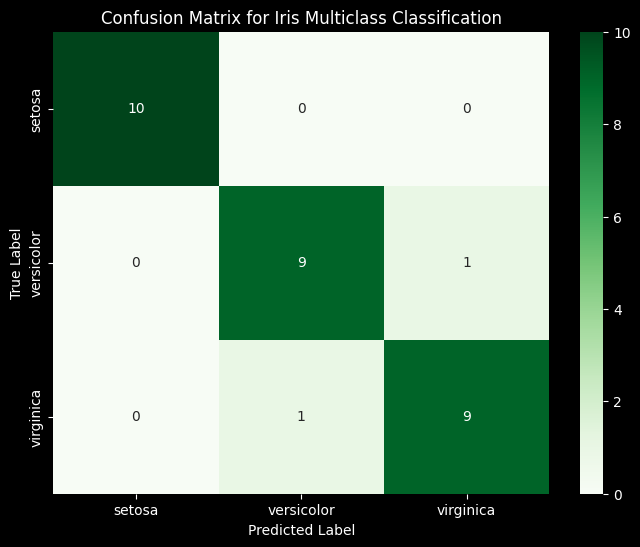

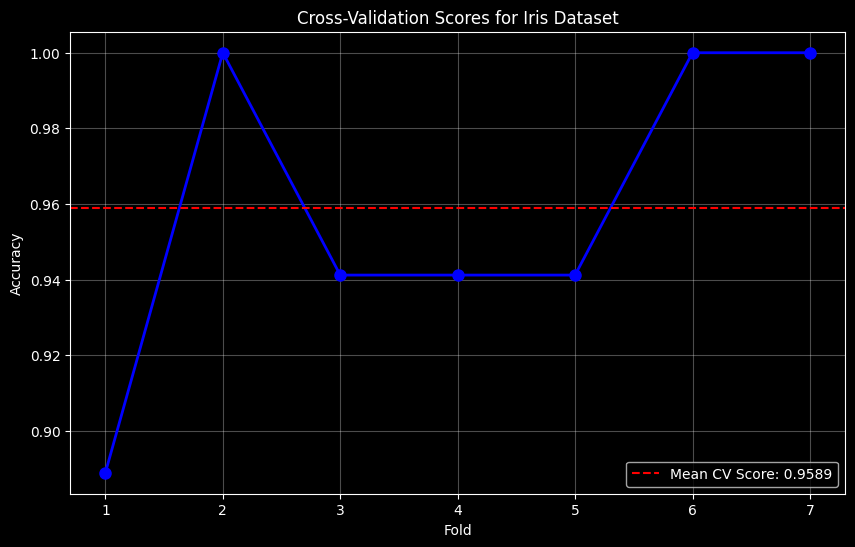

In [96]:
# Plot the confusion matrix for Iris dataset
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_iris, annot=True, fmt='d', cmap='Greens', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Iris Multiclass Classification')
plt.show()

# Plot Cross-Validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, 'bo-', linewidth=2, markersize=8)
plt.axhline(y=np.mean(cv_scores), color='r', linestyle='--', label=f'Mean CV Score: {np.mean(cv_scores):.4f}')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores for Iris Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Breast Cancer Dataset - Binary Classification with L1 Regularization

Implement Logistic Regression with L1 regularization on the Breast Cancer dataset. Evaluate the model using ROC AUC score and plot the ROC curve.

In [128]:
# Load the Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

print("Dataset shape:", X_cancer.shape)
print("Target shape:", y_cancer.shape)
print("Number of features:", len(cancer.feature_names))
print("Target names:", cancer.target_names)
print("\nClass distribution:")
unique, counts = np.unique(y_cancer, return_counts=True)
for i, target_name in enumerate(cancer.target_names):
    print(f"  {target_name}: {counts[i]} samples ({counts[i]/len(y_cancer)*100:.1f}%)")

print(f"\nFirst few feature names: {cancer.feature_names[:5]}")
print(f"Total features: {len(cancer.feature_names)}")

Dataset shape: (569, 30)
Target shape: (569,)
Number of features: 30
Target names: ['malignant' 'benign']

Class distribution:
  malignant: 212 samples (37.3%)
  benign: 357 samples (62.7%)

First few feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']
Total features: 30


In [129]:
# Split the data into training and testing sets
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer
)

print("Training set shape:", X_train_cancer.shape)
print("Test set shape:", X_test_cancer.shape)
print("Training class distribution:")
unique_train, counts_train = np.unique(y_train_cancer, return_counts=True)
for i, target_name in enumerate(cancer.target_names):
    print(f"  {target_name}: {counts_train[i]} samples ({counts_train[i]/len(y_train_cancer)*100:.1f}%)")

Training set shape: (455, 30)
Test set shape: (114, 30)
Training class distribution:
  malignant: 170 samples (37.4%)
  benign: 285 samples (62.6%)


In [130]:
# Standardize the features
scaler_cancer = StandardScaler()
X_train_cancer_scaled = scaler_cancer.fit_transform(X_train_cancer)
X_test_cancer_scaled = scaler_cancer.transform(X_test_cancer)

print("Feature scaling completed.")
print("Scaled training data shape:", X_train_cancer_scaled.shape)
print("Feature scaling is important for L1 regularization as it's sensitive to feature scales.")

Feature scaling completed.
Scaled training data shape: (455, 30)
Feature scaling is important for L1 regularization as it's sensitive to feature scales.


In [131]:
# Train Logistic Regression model with L1 regularization (Lasso)
cancer_model_l1 = LogisticRegression(
    penalty='l1', 
    solver='liblinear',  # liblinear supports L1 regularization
    random_state=42, 
    max_iter=1000,
    C=1.0  # Regularization strength (smaller values = stronger regularization)
)

cancer_model_l1.fit(X_train_cancer_scaled, y_train_cancer)

# Make predictions
y_pred_cancer = cancer_model_l1.predict(X_test_cancer_scaled)
y_pred_proba_cancer = cancer_model_l1.predict_proba(X_test_cancer_scaled)[:, 1]

# Calculate accuracy
test_accuracy_cancer = accuracy_score(y_test_cancer, y_pred_cancer)
print(f"Test Accuracy: {test_accuracy_cancer:.4f} ({test_accuracy_cancer*100:.2f}%)")
print("Model training completed!")

# Check feature selection effect of L1 regularization
non_zero_features = np.sum(cancer_model_l1.coef_[0] != 0)
print(f"L1 regularization selected {non_zero_features} out of {X_cancer.shape[1]} features")

Test Accuracy: 0.9912 (99.12%)
Model training completed!
L1 regularization selected 16 out of 30 features


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: in

In [174]:
# Calculate ROC AUC Score
roc_auc_cancer = roc_auc_score(y_test_cancer, y_pred_proba_cancer)

print("=== BREAST CANCER CLASSIFICATION RESULTS (L1 Regularization) ===")
print(f"Test Accuracy: {test_accuracy_cancer:.4f} ({test_accuracy_cancer*100:.2f}%)")
print(f"ROC AUC Score: {roc_auc_cancer:.4f}")

# Additional metrics
conf_matrix_cancer = confusion_matrix(y_test_cancer, y_pred_cancer)
print("\nConfusion Matrix:")
print(conf_matrix_cancer)

print("\nDetailed Classification Report:")
print(classification_report(y_test_cancer, y_pred_cancer, target_names=cancer.target_names))

=== BREAST CANCER CLASSIFICATION RESULTS (L1 Regularization) ===
Test Accuracy: 0.9912 (99.12%)
ROC AUC Score: 0.9967

Confusion Matrix:
[[41  1]
 [ 0 72]]

Detailed Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.98      0.99        42
      benign       0.99      1.00      0.99        72

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


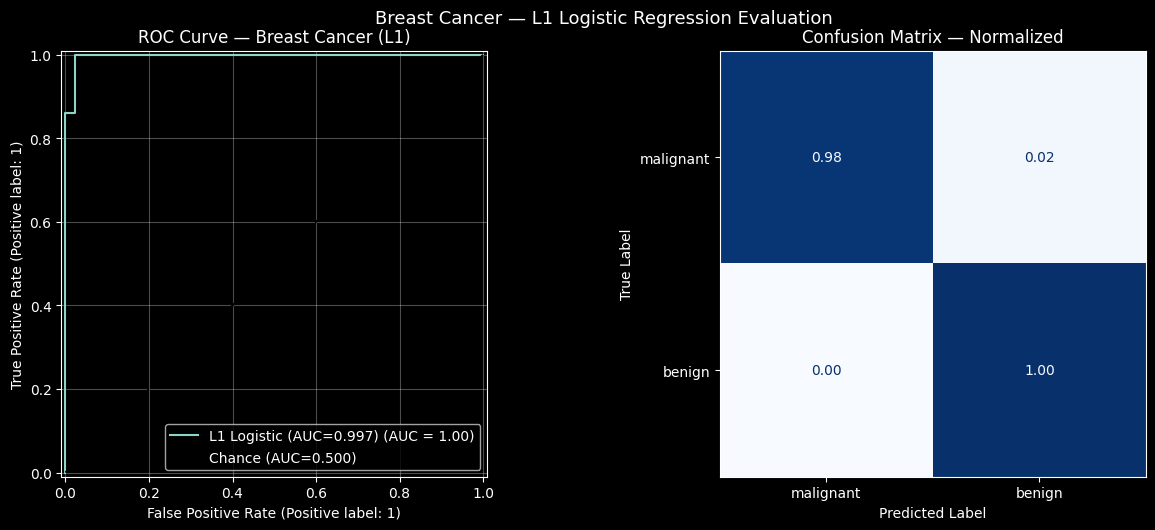

In [179]:
# Clean, readable ROC + Confusion Matrix for Breast Cancer (L1)
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

fig, axes = plt.subplots(1, 2, figsize=(13, 5), constrained_layout=True)

# 1) ROC Curve with AUC in legend
RocCurveDisplay.from_estimator(
    cancer_model_l1, X_test_cancer_scaled, y_test_cancer,
    ax=axes[0], name=f'L1 Logistic (AUC={roc_auc_cancer:.3f})'
)
axes[0].plot([0, 1], [0, 1], 'k--', label='Chance (AUC=0.500)')
axes[0].set_title('ROC Curve — Breast Cancer (L1)')
axes[0].legend(loc='lower right', frameon=True)
axes[0].grid(True, alpha=0.3)

# 2) Confusion Matrix (normalized=True for comparability)
ConfusionMatrixDisplay.from_predictions(
    y_test_cancer, y_pred_cancer,
    normalize='true',
    display_labels=cancer.target_names,  # ['malignant', 'benign']
    values_format='.2f',
    cmap='Blues',
    ax=axes[1],
    colorbar=False
)
axes[1].set_title('Confusion Matrix — Normalized')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

fig.suptitle('Breast Cancer — L1 Logistic Regression Evaluation', y=1.03, fontsize=13)
plt.show()

=== L1 REGULARIZATION FEATURE SELECTION ANALYSIS ===
Total features: 30
Selected features: 16
Eliminated features: 14

Top 10 Most Important Features (by |coefficient|):
   1. worst area                (coef: -3.5299)
   2. radius error              (coef: -2.1678)
   3. worst concave points      (coef: -1.7055)
   4. worst radius              (coef: -1.2487)
   5. worst texture             (coef: -1.2055)
   6. compactness error         (coef: +0.6983)
   7. worst concavity           (coef: -0.6779)
   8. worst symmetry            (coef: -0.6638)
   9. worst smoothness          (coef: -0.6097)
  10. mean concave points       (coef: -0.4892)


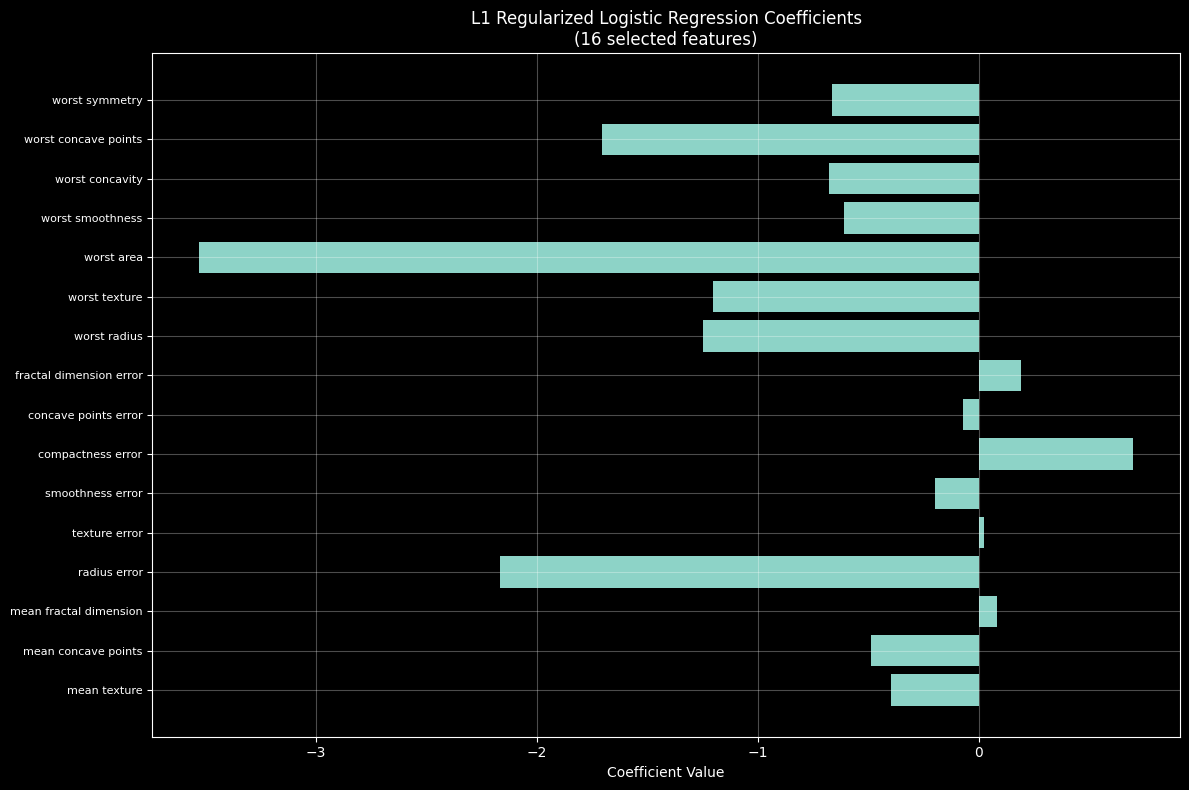

In [138]:
# Analyze L1 Regularization Feature Selection
# Show which features were selected/eliminated by L1 regularization
feature_importance = np.abs(cancer_model_l1.coef_[0])
selected_features = feature_importance > 0

print("=== L1 REGULARIZATION FEATURE SELECTION ANALYSIS ===")
print(f"Total features: {len(cancer.feature_names)}")
print(f"Selected features: {np.sum(selected_features)}")
print(f"Eliminated features: {np.sum(~selected_features)}")

# Show top 10 most important features
feature_ranking = np.argsort(feature_importance)[::-1]
print(f"\nTop 10 Most Important Features (by |coefficient|):")
for i, idx in enumerate(feature_ranking[:10]):
    if feature_importance[idx] > 0:
        print(f"  {i+1:2d}. {cancer.feature_names[idx]:25s} (coef: {cancer_model_l1.coef_[0][idx]:+.4f})")

# Plot feature coefficients
plt.figure(figsize=(12, 8))
non_zero_idx = np.where(selected_features)[0]
non_zero_coefs = cancer_model_l1.coef_[0][non_zero_idx]
non_zero_names = [cancer.feature_names[i] for i in non_zero_idx]

plt.barh(range(len(non_zero_coefs)), non_zero_coefs)
plt.yticks(range(len(non_zero_coefs)), non_zero_names, fontsize=8)
plt.xlabel('Coefficient Value')
plt.title(f'L1 Regularized Logistic Regression Coefficients\n({len(non_zero_coefs)} selected features)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Wine Quality Dataset - Imbalanced Classification with Class Weights

Implement Logistic Regression with class weights on an imbalanced dataset (Wine Quality dataset). Evaluate the model using log loss and plot the precision-recall curve.

In [160]:
# Load Wine Quality dataset from sklearn or create imbalanced binary classification
# We'll use the Wine dataset and create an imbalanced binary problem
from sklearn.datasets import load_wine
from sklearn.metrics import log_loss, precision_recall_curve, PrecisionRecallDisplay

# Load wine dataset
wine = load_wine()
X_wine = wine.data
y_wine_original = wine.target

# Create imbalanced binary classification: Class 0 vs Others (Classes 1&2)
# This creates imbalance since Class 0 has fewer samples
y_wine_binary = (y_wine_original == 0).astype(int)  # 1 if class 0, 0 otherwise

print("Dataset shape:", X_wine.shape)
print("Original classes:", np.unique(y_wine_original, return_counts=True))
print("Binary classes:", np.unique(y_wine_binary, return_counts=True))
print("\nClass distribution (Binary imbalanced):")
unique, counts = np.unique(y_wine_binary, return_counts=True)
for i, count in enumerate(counts):
    print(f"  Class {i}: {count} samples ({count/len(y_wine_binary)*100:.1f}%)")

print(f"\nImbalance ratio: {counts[0]/counts[1]:.2f}:1 (majority:minority)")
print(f"Feature names: {wine.feature_names[:5]} ... (total: {len(wine.feature_names)})")

Dataset shape: (178, 13)
Original classes: (array([0, 1, 2]), array([59, 71, 48]))
Binary classes: (array([0, 1]), array([119,  59]))

Class distribution (Binary imbalanced):
  Class 0: 119 samples (66.9%)
  Class 1: 59 samples (33.1%)

Imbalance ratio: 2.02:1 (majority:minority)
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium'] ... (total: 13)


In [143]:
# Split the data into training and testing sets
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine, y_wine_binary, test_size=0.2, random_state=42, stratify=y_wine_binary
)

print("Training set shape:", X_train_wine.shape)
print("Test set shape:", X_test_wine.shape)
print("Training class distribution:")
unique_train, counts_train = np.unique(y_train_wine, return_counts=True)
for i, count in enumerate(counts_train):
    print(f"  Class {i}: {count} samples ({count/len(y_train_wine)*100:.1f}%)")

Training set shape: (142, 13)
Test set shape: (36, 13)
Training class distribution:
  Class 0: 95 samples (66.9%)
  Class 1: 47 samples (33.1%)


In [144]:
# Standardize the features
scaler_wine = StandardScaler()
X_train_wine_scaled = scaler_wine.fit_transform(X_train_wine)
X_test_wine_scaled = scaler_wine.transform(X_test_wine)

print("Feature scaling completed.")
print("Scaled training data shape:", X_train_wine_scaled.shape)

Feature scaling completed.
Scaled training data shape: (142, 13)


In [161]:
# Train two models: one without class weights, one with class weights
print("Training models...")

# Model 1: Standard Logistic Regression (no class weights)
wine_model_standard = LogisticRegression(random_state=42, max_iter=1000)
wine_model_standard.fit(X_train_wine_scaled, y_train_wine)

# Model 2: Logistic Regression with balanced class weights
wine_model_balanced = LogisticRegression(
    random_state=42, 
    max_iter=1000,
    class_weight='balanced'  # Automatically adjusts weights inversely proportional to class frequencies
)
wine_model_balanced.fit(X_train_wine_scaled, y_train_wine)

# Make predictions
y_pred_wine_standard = wine_model_standard.predict(X_test_wine_scaled)
y_pred_proba_wine_standard = wine_model_standard.predict_proba(X_test_wine_scaled)[:, 1]

y_pred_wine_balanced = wine_model_balanced.predict(X_test_wine_scaled)
y_pred_proba_wine_balanced = wine_model_balanced.predict_proba(X_test_wine_scaled)[:, 1]



print("Model training completed!")

Training models...
Model training completed!


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:165: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:165: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:165: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:295: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_linea

In [165]:
# Calculate Log Loss and other metrics for both models
log_loss_standard = log_loss(y_test_wine, y_pred_proba_wine_standard)
log_loss_balanced = log_loss(y_test_wine, y_pred_proba_wine_balanced)
classification_report_standard = classification_report(y_test_wine, y_pred_wine_standard)

accuracy_standard = accuracy_score(y_test_wine, y_pred_wine_standard)
accuracy_balanced = accuracy_score(y_test_wine, y_pred_wine_balanced)
classification_report_balanced = classification_report(y_test_wine, y_pred_wine_balanced)

print("=== WINE QUALITY IMBALANCED CLASSIFICATION RESULTS ===")
print(f"\nStandard Model (No Class Weights):")
print(f"  Accuracy: {accuracy_standard:.4f} ({accuracy_standard*100:.2f}%)")
print(f"  Log Loss: {log_loss_standard:.4f}")
print(f"\nClassification Report (Standard Model):\n{classification_report_standard}")

print(f"\nBalanced Model (With Class Weights):")
print(f"  Accuracy: {accuracy_balanced:.4f} ({accuracy_balanced*100:.2f}%)")
print(f"  Log Loss: {log_loss_balanced:.4f}")
print(f"\nClassification Report (Balanced Model):\n{classification_report_balanced}")

print(f"\nLog Loss Improvement: {log_loss_standard - log_loss_balanced:+.4f}")
if log_loss_balanced < log_loss_standard:
    print("✓ Class weights IMPROVED log loss (lower is better)")
else:
    print("✗ Class weights did not improve log loss")

=== WINE QUALITY IMBALANCED CLASSIFICATION RESULTS ===

Standard Model (No Class Weights):
  Accuracy: 0.9722 (97.22%)
  Log Loss: 0.0516

Classification Report (Standard Model):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.92      1.00      0.96        12

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36


Balanced Model (With Class Weights):
  Accuracy: 0.9722 (97.22%)
  Log Loss: 0.0559

Classification Report (Balanced Model):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.92      1.00      0.96        12

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36


Log Loss Improvement: -0.0043
✗ Class we

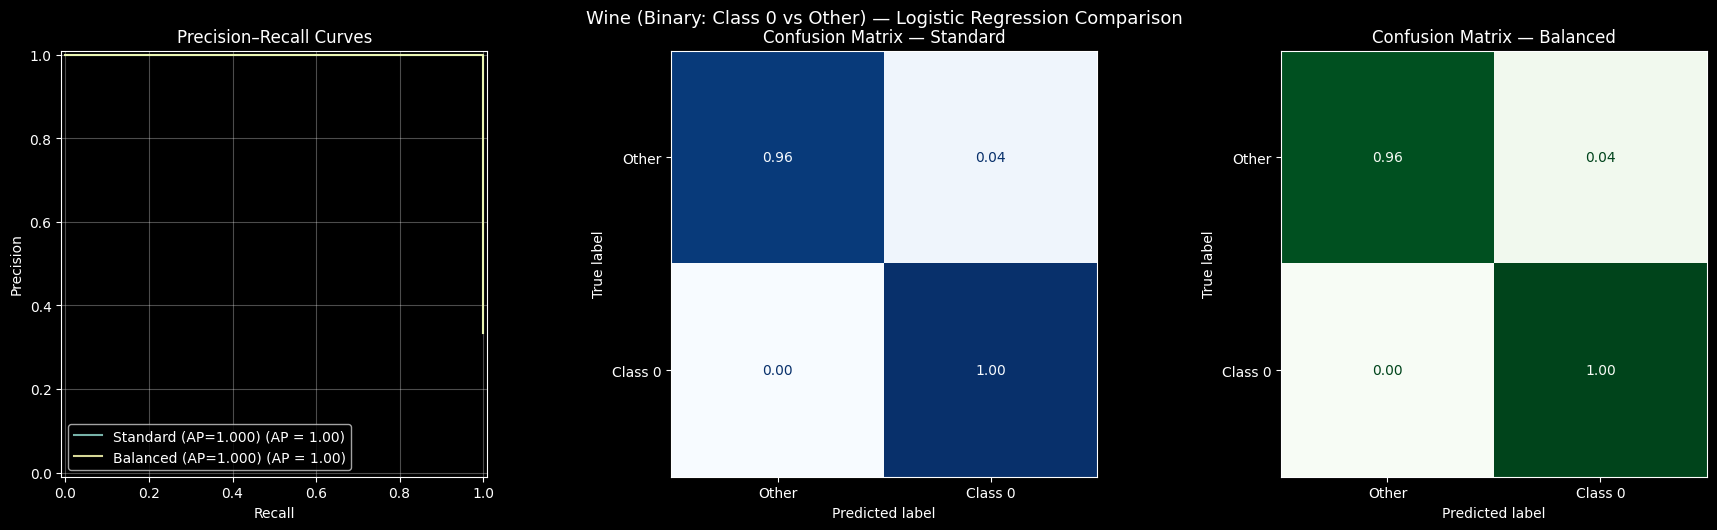

In [202]:
# Clean, readable Wine section plots: PR curves + normalized confusion matrices
from sklearn.metrics import ConfusionMatrixDisplay, average_precision_score

fig, axes = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

# 1) Precision–Recall curves
ap_standard = average_precision_score(y_test_wine, y_pred_proba_wine_standard)
ap_balanced = average_precision_score(y_test_wine, y_pred_proba_wine_balanced)

PrecisionRecallDisplay.from_estimator(
    wine_model_standard, X_test_wine_scaled, y_test_wine,
    name=f'Standard (AP={ap_standard:.3f})', ax=axes[0], alpha=0.85
)
PrecisionRecallDisplay.from_estimator(
    wine_model_balanced, X_test_wine_scaled, y_test_wine,
    name=f'Balanced (AP={ap_balanced:.3f})', ax=axes[0], alpha=0.85
)
axes[0].set_title('Precision–Recall Curves')
axes[0].set_xlabel('Recall')
axes[0].set_ylabel('Precision')
axes[0].legend(loc='lower left', frameon=True)
axes[0].grid(True, alpha=0.3)

# 2) Confusion Matrix — Standard (normalized)
ConfusionMatrixDisplay.from_predictions(
    y_test_wine, y_pred_wine_standard,
    normalize='true',
    display_labels=['Other', 'Class 0'],
    cmap='Blues',
    values_format='.2f',
    ax=axes[1],
    colorbar=False
)
axes[1].set_title('Confusion Matrix — Standard')

# 3) Confusion Matrix — Balanced (normalized)
ConfusionMatrixDisplay.from_predictions(
    y_test_wine, y_pred_wine_balanced,
    normalize='true',
    display_labels=['Other', 'Class 0'],
    cmap='Greens',
    values_format='.2f',
    ax=axes[2],
    colorbar=False
)
axes[2].set_title('Confusion Matrix — Balanced')

fig.suptitle('Wine (Binary: Class 0 vs Other) — Logistic Regression Comparison', y=1.03, fontsize=13)
plt.show()

# MNIST Dataset - Solver Comparison with Cross-Validation

Implement Logistic Regression with different solvers (liblinear, lbfgs, saga) on the MNIST dataset. Compare the performance of each solver using cross-validation and visualize the results.

In [187]:
# Solver: saga (multinomial)
import time
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

print("=== MNIST — Solver: saga (Multinomial) ===")
model_saga = LogisticRegression(
    solver='saga',
    random_state=42,
    max_iter=1000,
    multi_class='multinomial'
)

start_time = time.time()
cv_scores_saga = cross_val_score(
    model_saga, X_train_mnist_scaled, y_train_mnist,
    cv=3, scoring='accuracy', n_jobs=1
)
train_time_saga = time.time() - start_time

model_saga.fit(X_train_mnist_scaled, y_train_mnist)
test_acc_saga = model_saga.score(X_test_mnist_scaled, y_test_mnist)

cv_mean_saga = np.mean(cv_scores_saga)
cv_std_saga = np.std(cv_scores_saga)

print(f"CV Mean: {cv_mean_saga:.4f} (±{cv_std_saga:.4f})")
print(f"Test Accuracy: {test_acc_saga:.4f}")
print(f"Training Time: {train_time_saga:.2f} seconds")

=== MNIST — Solver: saga (Multinomial) ===
CV Mean: 0.9666 (±0.0085)
Test Accuracy: 0.9722
Training Time: 1.91 seconds


Dataset shape: (1797, 64)
Target shape: (1797,)
Number of classes: 10
Class distribution:
  Digit 0: 178 samples
  Digit 1: 182 samples
  Digit 2: 177 samples
  Digit 3: 183 samples
  Digit 4: 181 samples
  Digit 5: 182 samples
  Digit 6: 181 samples
  Digit 7: 179 samples
  Digit 8: 174 samples
  Digit 9: 180 samples

Image dimensions: 8x8 pixels
Feature vector length: 64 pixels


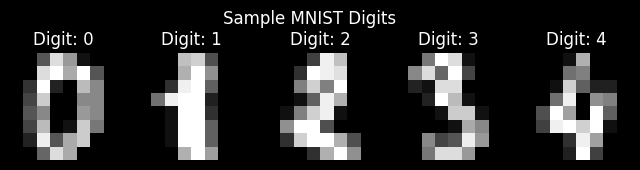

In [180]:
# Load MNIST dataset (use digits dataset as it's smaller and faster)
from sklearn.datasets import load_digits
import time

# Load digits dataset (8x8 images of digits 0-9)
digits = load_digits()
X_mnist = digits.data
y_mnist = digits.target

print("Dataset shape:", X_mnist.shape)
print("Target shape:", y_mnist.shape)
print("Number of classes:", len(np.unique(y_mnist)))
print("Class distribution:")
unique, counts = np.unique(y_mnist, return_counts=True)
for digit, count in zip(unique, counts):
    print(f"  Digit {digit}: {count} samples")

print(f"\nImage dimensions: 8x8 pixels")
print(f"Feature vector length: {X_mnist.shape[1]} pixels")

# Show a sample digit
plt.figure(figsize=(8, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Digit: {y_mnist[i]}')
    plt.axis('off')
plt.suptitle('Sample MNIST Digits')
plt.show()

In [181]:
# Prepare data for solver comparison
X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist = train_test_split(
    X_mnist, y_mnist, test_size=0.2, random_state=42, stratify=y_mnist
)

# Standardize the features
scaler_mnist = StandardScaler()
X_train_mnist_scaled = scaler_mnist.fit_transform(X_train_mnist)
X_test_mnist_scaled = scaler_mnist.transform(X_test_mnist)

print("Training set shape:", X_train_mnist_scaled.shape)
print("Test set shape:", X_test_mnist_scaled.shape)
print("Feature scaling completed.")

Training set shape: (1437, 64)
Test set shape: (360, 64)
Feature scaling completed.


In [196]:
# Solver: liblinear (OvR)
import time
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

print("=== MNIST — Solver: liblinear (One-vs-Rest) ===")
model_liblinear = LogisticRegression(
    solver='liblinear',
    random_state=42,
    max_iter=1000,
    multi_class='ovr'  # liblinear supports only OvR for multiclass
)

start_time = time.time()
cv_scores_liblinear = cross_val_score(
    model_liblinear, X_train_mnist_scaled, y_train_mnist,
    cv=3, scoring='accuracy', n_jobs=1
)
train_time_liblinear = time.time() - start_time

model_liblinear.fit(X_train_mnist_scaled, y_train_mnist)
test_acc_liblinear = model_liblinear.score(X_test_mnist_scaled, y_test_mnist)

cv_mean_liblinear = np.mean(cv_scores_liblinear)
cv_std_liblinear = np.std(cv_scores_liblinear)

print(f"CV Mean: {cv_mean_liblinear:.4f} (±{cv_std_liblinear:.4f})")
print(f"Test Accuracy: {test_acc_liblinear:.4f}")
print(f"Training Time: {train_time_liblinear:.2f} seconds")

=== MNIST — Solver: liblinear (One-vs-Rest) ===
CV Mean: 0.9506 (±0.0094)
Test Accuracy: 0.9667
Training Time: 0.15 seconds


In [197]:
# Solver: lbfgs (multinomial)
import time
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

print("=== MNIST — Solver: lbfgs (Multinomial) ===")
model_lbfgs = LogisticRegression(
    solver='lbfgs',
    random_state=42,
    max_iter=1000,
    multi_class='multinomial'
)

start_time = time.time()
cv_scores_lbfgs = cross_val_score(
    model_lbfgs, X_train_mnist_scaled, y_train_mnist,
    cv=3, scoring='accuracy', n_jobs=1
)
train_time_lbfgs = time.time() - start_time

model_lbfgs.fit(X_train_mnist_scaled, y_train_mnist)
test_acc_lbfgs = model_lbfgs.score(X_test_mnist_scaled, y_test_mnist)

cv_mean_lbfgs = np.mean(cv_scores_lbfgs)
cv_std_lbfgs = np.std(cv_scores_lbfgs)

print(f"CV Mean: {cv_mean_lbfgs:.4f} (±{cv_std_lbfgs:.4f})")
print(f"Test Accuracy: {test_acc_lbfgs:.4f}")
print(f"Training Time: {train_time_lbfgs:.2f} seconds")

=== MNIST — Solver: lbfgs (Multinomial) ===
CV Mean: 0.9659 (±0.0094)
Test Accuracy: 0.9722
Training Time: 0.03 seconds


In [198]:
# Solver: saga (multinomial)
import time
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

print("=== MNIST — Solver: saga (Multinomial) ===")
model_saga = LogisticRegression(
    solver='saga',
    random_state=42,
    max_iter=1000,
    multi_class='multinomial'
)

start_time = time.time()
cv_scores_saga = cross_val_score(
    model_saga, X_train_mnist_scaled, y_train_mnist,
    cv=3, scoring='accuracy', n_jobs=1
)
train_time_saga = time.time() - start_time

model_saga.fit(X_train_mnist_scaled, y_train_mnist)
test_acc_saga = model_lbfgs.score(X_test_mnist_scaled, y_test_mnist)

cv_mean_saga = np.mean(cv_scores_saga)
cv_std_saga = np.std(cv_scores_saga)

print(f"CV Mean: {cv_mean_saga:.4f} (±{cv_std_saga:.4f})")
print(f"Test Accuracy: {test_acc_saga:.4f}")
print(f"Training Time: {train_time_saga:.2f} seconds")

=== MNIST — Solver: saga (Multinomial) ===
CV Mean: 0.9666 (±0.0085)
Test Accuracy: 0.9722
Training Time: 1.96 seconds


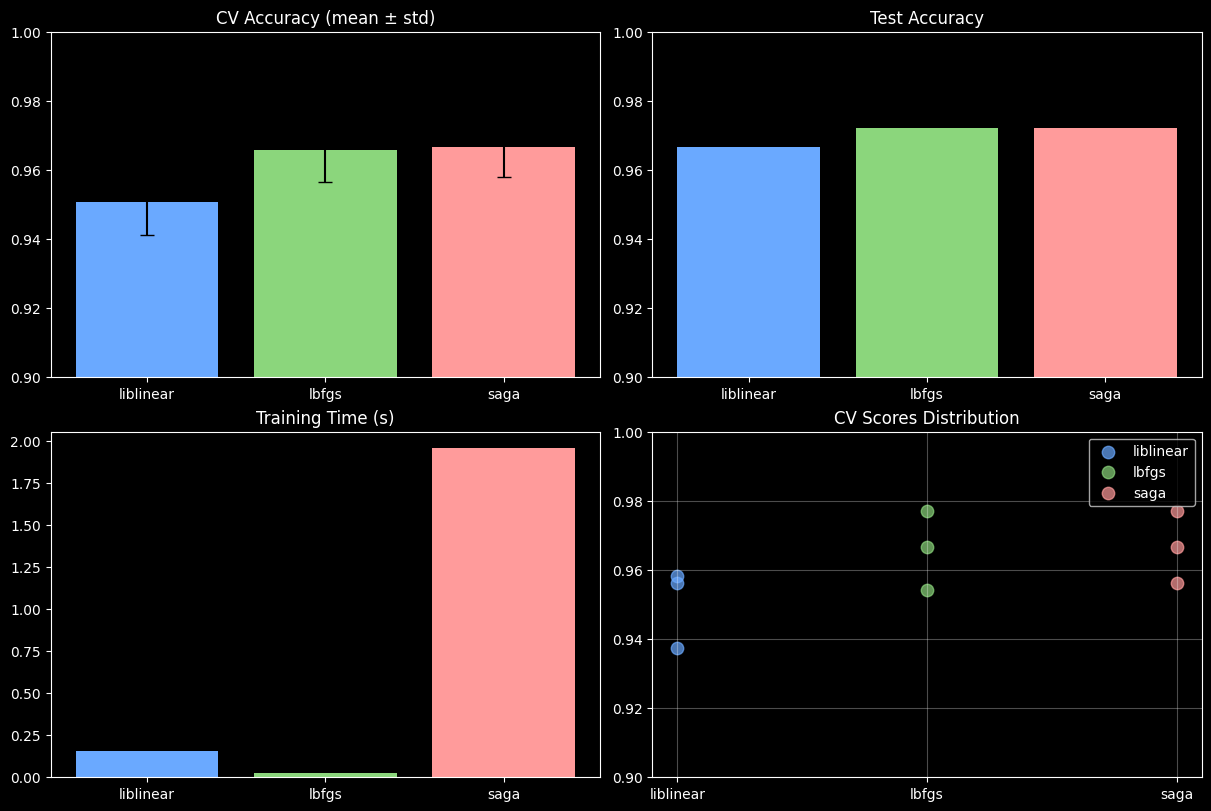

In [199]:
# Compare and summarize solver results (optional visualization)
import matplotlib.pyplot as plt

labels = ['liblinear', 'lbfgs', 'saga']
cv_means = [cv_mean_liblinear, cv_mean_lbfgs, cv_mean_saga]
cv_stds = [cv_std_liblinear, cv_std_lbfgs, cv_std_saga]
test_accs = [test_acc_liblinear, test_acc_lbfgs, test_acc_saga]
times = [train_time_liblinear, train_time_lbfgs, train_time_saga]

fig, axes = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)

# CV means with std
axes[0, 0].bar(labels, cv_means, yerr=cv_stds, capsize=5, color=['#6aa9ff', '#8bd67c', '#ff9b9b'])
axes[0, 0].set_title('CV Accuracy (mean ± std)')
axes[0, 0].set_ylim(0.9, 1.0)

# Test accuracy
axes[0, 1].bar(labels, test_accs, color=['#6aa9ff', '#8bd67c', '#ff9b9b'])
axes[0, 1].set_title('Test Accuracy')
axes[0, 1].set_ylim(0.9, 1.0)

# Training time
axes[1, 0].bar(labels, times, color=['#6aa9ff', '#8bd67c', '#ff9b9b'])
axes[1, 0].set_title('Training Time (s)')

# CV scores scatter per solver for a sense of spread
for i, (scores, color) in enumerate(zip(
    [cv_scores_liblinear, cv_scores_lbfgs, cv_scores_saga],
    ['#6aa9ff', '#8bd67c', '#ff9b9b']
)):
    axes[1, 1].scatter([i]*len(scores), scores, s=80, alpha=0.7, color=color, label=labels[i])
axes[1, 1].set_xticks(range(len(labels)))
axes[1, 1].set_xticklabels(labels)
axes[1, 1].set_title('CV Scores Distribution')
axes[1, 1].legend()
axes[1, 1].set_ylim(0.9, 1.0)
axes[1, 1].grid(True, alpha=0.3)

plt.show()

# Practice


In [ ]:
#Load Dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target
# Split Data Set into Training and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Convert to a pandas DataFrame
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
#Display the first few rows of data
print(cancer_df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  mean compactness  mean concavity  mean concave points  mean symmetry  mean fractal dimension  radius error  texture error  perimeter error  area error  smoothness error  compactness error  concavity error  concave points error  symmetry error  fractal dimension error  worst radius  worst texture  worst perimeter  worst area  worst smoothness  worst compactness  worst concavity  worst concave points  worst symmetry  worst fractal dimension
0        17.99         10.38          122.80     1001.0          0.11840           0.27760          0.3001              0.14710         0.2419                 0.07871        1.0950         0.9053            8.589      153.40          0.006399            0.04904          0.05373               0.01587         0.03003                 0.006193         25.38          17.33           184.60      2019.0            0.1622             0.6656           0.7119                0.2654        

In [ ]:
print(cancer_df.describe())

       mean radius  mean texture  mean perimeter    mean area  mean smoothness  mean compactness  mean concavity  mean concave points  mean symmetry  mean fractal dimension  radius error  texture error  perimeter error  area error  smoothness error  compactness error  concavity error  concave points error  symmetry error  fractal dimension error  worst radius  worst texture  worst perimeter   worst area  worst smoothness  worst compactness  worst concavity  worst concave points  worst symmetry  worst fractal dimension
count   569.000000    569.000000      569.000000   569.000000       569.000000        569.000000      569.000000           569.000000     569.000000              569.000000    569.000000     569.000000       569.000000  569.000000        569.000000         569.000000       569.000000            569.000000      569.000000               569.000000    569.000000     569.000000       569.000000   569.000000        569.000000         569.000000       569.000000            569.

## Perform Standardisation

In [ ]:
# Initialize the scaler
scaler = StandardScaler()
# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize the model
model = LogisticRegression(max_iter = 1000)
# Train the model
model.fit(X_train_scaled, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:165: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:165: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:165: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:295: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_linea

LogisticRegression(max_iter=1000)

In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9736842105263158
Confusion Matrix:
 [[41  2]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [ ]:
# Predict confidence scores
confidence_scores = model.decision_function(X_test_scaled)
print("Confidence Scores:\n", confidence_scores)
# Predict probabilities
probabilities = model.predict_proba(X_test_scaled)
print("Probabilities:\n", probabilities)

Confidence Scores:
 [  2.05458164 -11.61723728  -5.78003558   7.58032642   9.71051214
 -23.07915912 -20.29361134  -3.31965395   0.49234144   7.18221862
   2.94714158  -4.37699996   5.09767542  -1.78301791   6.4226227
  -7.2078736    6.28938712  11.40260482  14.01594352 -13.70484974
   2.38707795   4.6209198  -19.25600828   9.44701385   6.77669058
   7.44401977   6.83487581   5.11414737   5.85648596 -11.71344761
   7.56615778   8.81302666   6.13504665   5.19856421   8.86869519
   6.02018114  -2.79520176   5.84058879  -9.32919382   2.98438363
   9.54933841  -7.80725334   6.00252369   6.94357473   3.89237121
   2.56304876   7.8272239    7.61933856   3.46007556   7.39487513
  -9.02501611 -16.75049511   0.80849394   4.31199773  10.50630154
   4.64212121   9.08908514 -25.63922586  -1.62565167   8.87917263
   5.29057412 -14.61557873 -20.37936989   3.43875292   7.09434774
   1.90273509 -11.18172786 -19.87661443   7.11942825   3.87254091
  -6.62334879  -6.43085447   5.95968492  -5.39126225   9.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: in

In [ ]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
print("ROC AUC Score:", roc_auc)
# Calculate Log Loss
log_loss_value = log_loss(y_test, model.predict_proba(X_test))
print("Log Loss:", log_loss_value)

ROC AUC Score: 0.99737962659679
Log Loss: 22.44824026866068


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: in

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


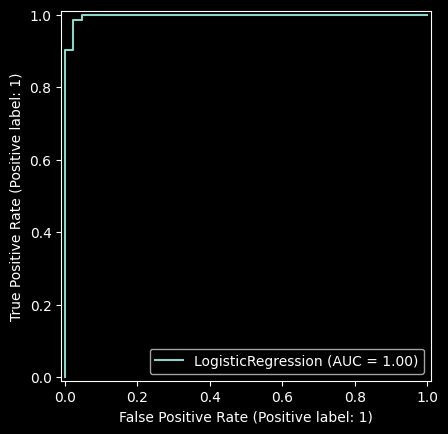

In [ ]:
# Plot ROC curve
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.show()

In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.97802198 0.96703297 1.         0.97802198 0.94505495]
Mean CV Score: 0.9736263736263737


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:165: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:165: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:165: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:295: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_linea

In [ ]:
# Initialize the model with L2 regularization
L2model = LogisticRegression(penalty='l2', solver='saga', max_iter = 3000)
# Train the model
L2model.fit(X_train_scaled, y_train)
# Initialize the model with L1 regularization
L1model = LogisticRegression(penalty='l1', solver='saga', max_iter = 3000)
# Train the model
L1model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=3000, penalty='l1', solver='saga')

## Regularisation

In [ ]:
#Perform predictions for both models
L2_y_pred = L2model.predict(X_test_scaled)
L1_y_pred = L1model.predict(X_test_scaled)
# Evaluate both models
print("Classification Report (L2):\n", classification_report(y_test, L2_y_pred))
print("Classification Report (L1):\n", classification_report(y_test, L1_y_pred))

Classification Report (L2):
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Classification Report (L1):
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: in

## Class Weights

In [ ]:
# Initialize the model with class weights
CWmodel = LogisticRegression(class_weight='balanced')
# Train the model
CWmodel.fit(X_train_scaled, y_train)
CW_y_pred = CWmodel.predict(X_test_scaled)
# Now perform classifier performance evaluation and compare with unbalanced approach.
#What happens for the cancer data set? In particular the malignant class.
print("Accuracy:", accuracy_score(y_test, CW_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, CW_y_pred))
print("Classification Report:\n", classification_report(y_test, CW_y_pred))

Accuracy: 0.9824561403508771
Confusion Matrix:
 [[42  1]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:165: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:165: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:165: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_linear_loss.py:295: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_linea

## Intercept Bias

In [ ]:
# Access the intercept term
intercept = model.intercept_
print("Original Intercept (Bias Term):", intercept)
# Calculate the baseline probability
baseline_prob = np.exp(intercept) / (1 + np.exp(intercept))
print("Original Baseline Probability:", baseline_prob)


Original Intercept (Bias Term): [0.44558453]
Original Baseline Probability: [0.6095889]


In [ ]:
# Adjust the intercept term
adjusted_intercept = intercept - 1 # Intercept adjustment
model.intercept_ = adjusted_intercept
print("Adjusted Intercept (Bias Term):", adjusted_intercept)
# Calculate the new baseline probability
new_baseline_prob = np.exp(adjusted_intercept) / (1 + np.exp(adjusted_intercept))
print("New Baseline Probability:", new_baseline_prob)

Adjusted Intercept (Bias Term): [-0.55441547]
New Baseline Probability: [0.36484059]


In [ ]:
# Make predictions with the adjusted model
y_pred_adjusted = model.predict(X_test_scaled)
# Evaluate the adjusted model
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
print("Accuracy with Adjusted Intercept:", accuracy_adjusted)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adjusted))
print("Classification Report:\n", classification_report(y_test, y_pred_adjusted))


Accuracy with Adjusted Intercept: 0.956140350877193
Confusion Matrix:
 [[42  1]
 [ 4 67]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.99      0.94      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


## Perform Multiclass Classification
        

In [ ]:
#Load and prepare iris data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Split Data Set into Training and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
# Initialize the scaler
scaler = StandardScaler()
# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy: 0.9298245614035088
Confusion Matrix:
 [[36  7]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90        43
           1       0.91      0.99      0.95        71

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


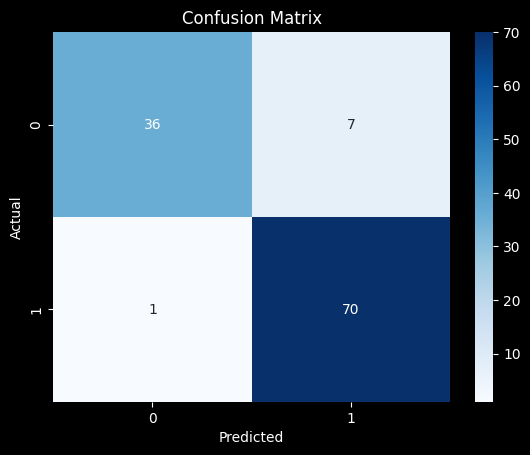

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Initialize the model for multiclass classification
irismodel = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# Train the model on Features 1 and 3 to also show visualisation exercises
irismodel.fit(X_train_scaled[:, [0, 2]],y_train)
# Make predictions
y_pred = irismodel.predict(X_test_scaled[:, [0, 2]])
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion matrix visualization


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()